**CEFET/RJ Nova Friburgo**  
**Técnicas de Aprendizado de Máquina**  
Thiago Rocha Duarte, Nicolly Vieira Santos Costa, Eric Pinheiro   
Dataset - Superstore Dataset   
Dataset containing Sales & Profits of a Superstore

## imports e carregar database

In [ ]:
from google.colab import files
import numpy as np
import kagglehub
import pandas as pd
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
import plotly.express as px
import warnings
#warnings.filterwarnings("ignore")

In [ ]:
# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/superstore-dataset-final


In [ ]:
for file in os.listdir(path):
    print(file)

file_name = 'Sample - Superstore.csv'

full_file_path = os.path.join(path, file_name)

try:
    dataframe = pd.read_csv(full_file_path, encoding='latin1')
    print(f"\nDataset '{file_name}' carregado com sucesso do caminho: {full_file_path}")
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_name}' não foi encontrado em '{full_file_path}'.")
    print("Por favor, verifique o nome do arquivo no output da listagem de diretório acima.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o dataset: {e}")

Sample - Superstore.csv

Dataset 'Sample - Superstore.csv' carregado com sucesso do caminho: /kaggle/input/superstore-dataset-final/Sample - Superstore.csv


## infos do database

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
dataframe.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
dataframe.describe(include='O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
dataframe.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
dataframe.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
print("Shipping modes: ")
print(dataframe['Ship Mode'].unique())
print("Countries: ")
print(dataframe['Country'].unique())
print('Number of states: ' + str(dataframe['State'].unique().shape[0]))
print("Region: ")
print(dataframe['Region'].unique())
print('Number of cities: ' + str(dataframe['City'].unique().shape[0]))
print("Categories: ")
print(dataframe['Category'].unique())
print("Number of Sub categories: " + str(dataframe['Sub-Category'].unique().shape[0]))
print("Number of Products: " + str(dataframe['Product ID'].unique().shape[0]))

Shipping modes: 
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Countries: 
['United States']
Number of states: 49
Region: 
['South' 'West' 'Central' 'East']
Number of cities: 531
Categories: 
['Furniture' 'Office Supplies' 'Technology']
Number of Sub categories: 17
Number of Products: 1862


## pré-processamento

In [ ]:
# Check for null values
print(dataframe.isnull().sum())
print(f'There is a total of {dataframe.isnull().sum().sum()/dataframe.shape[0] * 100} NaN values')

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
There is a total of 0.0 NaN values


In [ ]:
#check if there is duplicated values
dataframe.duplicated().sum()

np.int64(0)

In [ ]:
df = dataframe.copy()
data = dataframe.copy()

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.drop(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Region', 'Product ID', 'Product Name'], axis=1, inplace=True)
data.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [ ]:
data.drop(['Row ID', 'Ship Date', 'Country', 'Postal Code'], axis=1, inplace=True)
data.columns

Index(['Order Date', 'Segment', 'City', 'State', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# Alvo
target = "Sales"

# Colunas numéricas
num_cols = list(data.select_dtypes(include=['number']).columns)

# Colunas categóricas (exceto target)
cat_cols = [col for col in data.columns if col not in num_cols + [target]]

In [ ]:
print("Colunas numéricas:", num_cols)
print("Colunas categóricas:", cat_cols)

Colunas numéricas: ['Sales', 'Quantity', 'Discount', 'Profit']
Colunas categóricas: ['Order Date', 'Segment', 'City', 'State', 'Category', 'Sub-Category']


In [ ]:
df_base = data.copy()

## base 1

In [ ]:
# sem dummy, sem labelEncoder (original limpa)
data = df_base.copy()

data = data.copy()

## base 2

In [ ]:
# label encoder
data = df_base.copy()

le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   int64  
 1   Segment       9994 non-null   int64  
 2   City          9994 non-null   int64  
 3   State         9994 non-null   int64  
 4   Category      9994 non-null   int64  
 5   Sub-Category  9994 non-null   int64  
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 780.9 KB


## base 3

In [ ]:
# dummy em todas as categóricas
data = df_base.copy()

data = pd.get_dummies(data, columns=cat_cols, drop_first=True)
data.info()

## base 4

In [ ]:
# dummy em todas as categóricas menos Order Date, e separar Order Date em colunas de dia mês e ano
data = df_base.copy()

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

data.drop('Order Date', axis=1, inplace=True)

cat_cols_for_dummy = [col for col in cat_cols if col != 'Order Date']
data = pd.get_dummies(data, columns=cat_cols_for_dummy, drop_first=True)

data.info()

## base 5

In [ ]:
data = df_base.copy()
for col in cat_cols:
    print(f"Coluna '{col}': {data[col].nunique()} valores únicos")

Coluna 'Order Date': 1237 valores únicos
Coluna 'Segment': 3 valores únicos
Coluna 'City': 531 valores únicos
Coluna 'State': 49 valores únicos
Coluna 'Category': 3 valores únicos
Coluna 'Sub-Category': 17 valores únicos


In [ ]:
# Label Encoding em colunas categóricas com alta cardinalidade (muitos valores únicos) e dummy em colunas com baixa cardinalidade.
data = df_base.copy()

unique_value_threshold = 10 # Defina um limite para baixa cardinalidade

low_cardinality_cat_cols = [col for col in cat_cols if data[col].nunique() <= unique_value_threshold]
high_cardinality_cat_cols = [col for col in cat_cols if data[col].nunique() > unique_value_threshold]

# Aplicar Dummy em colunas de baixa cardinalidade
data = pd.get_dummies(data, columns=low_cardinality_cat_cols, drop_first=True)

# Aplicar Label Encoding em colunas de alta cardinalidade
le = LabelEncoder()
for col in high_cardinality_cat_cols:
    data[col] = le.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order Date                9994 non-null   int64  
 1   City                      9994 non-null   int64  
 2   State                     9994 non-null   int64  
 3   Sub-Category              9994 non-null   int64  
 4   Sales                     9994 non-null   float64
 5   Quantity                  9994 non-null   int64  
 6   Discount                  9994 non-null   float64
 7   Profit                    9994 non-null   float64
 8   Segment_Corporate         9994 non-null   bool   
 9   Segment_Home Office       9994 non-null   bool   
 10  Category_Office Supplies  9994 non-null   bool   
 11  Category_Technology       9994 non-null   bool   
dtypes: bool(4), float64(3), int64(5)
memory usage: 663.8 KB


## base 6

In [ ]:
# Feature Engineering na Data (Além de dia, mês, ano) - Além de separar dia, mês e ano, extrair outras características da coluna 'Order Date', como dia da semana, semana do ano, ou se é fim de semana.
data = df_base.copy()

data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek # 0 para segunda, 6 para domingo
data['Order Week of Year'] = data['Order Date'].dt.isocalendar().week.astype(int) # Semana do ano
data['Order Is Weekend'] = (data['Order Date'].dt.dayofweek >= 5).astype(int) # 1 se for fim de semana, 0 caso contrário

data.drop('Order Date', axis=1, inplace=True)

current_cat_cols = [col for col in cat_cols if col != 'Order Date']

data = pd.get_dummies(data, columns=current_cat_cols, drop_first=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Columns: 608 entries, Sales to Sub-Category_Tables
dtypes: bool(598), float64(3), int32(4), int64(3)
memory usage: 6.3 MB


## base 7

In [ ]:
# Label Encoding em colunas com 2 opções e Dummy no restante
data = df_base.copy()

current_cat_cols = [col for col in cat_cols]

binary_cat_cols = [col for col in current_cat_cols if data[col].nunique() == 2]
multi_value_cat_cols = [col for col in current_cat_cols if data[col].nunique() > 2]

le = LabelEncoder()
for col in binary_cat_cols:
    data[col] = le.fit_transform(data[col])

data = pd.get_dummies(data, columns=multi_value_cat_cols, drop_first=True)

data.info()

## base 8

In [ ]:
# Target Encoding para Colunas Categóricas - Substituir os valores categóricos pela média da variável alvo ('Sales') para cada categoria.
data = df_base.copy()

cat_cols_for_target_encoding = [col for col in cat_cols]

for col in cat_cols_for_target_encoding:
    mean_sales_by_category = data.groupby(col)[target].transform('mean')
    data[col] = mean_sales_by_category

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   float64
 1   Segment       9994 non-null   float64
 2   City          9994 non-null   float64
 3   State         9994 non-null   float64
 4   Category      9994 non-null   float64
 5   Sub-Category  9994 non-null   float64
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 780.9 KB


## lidar com outliers

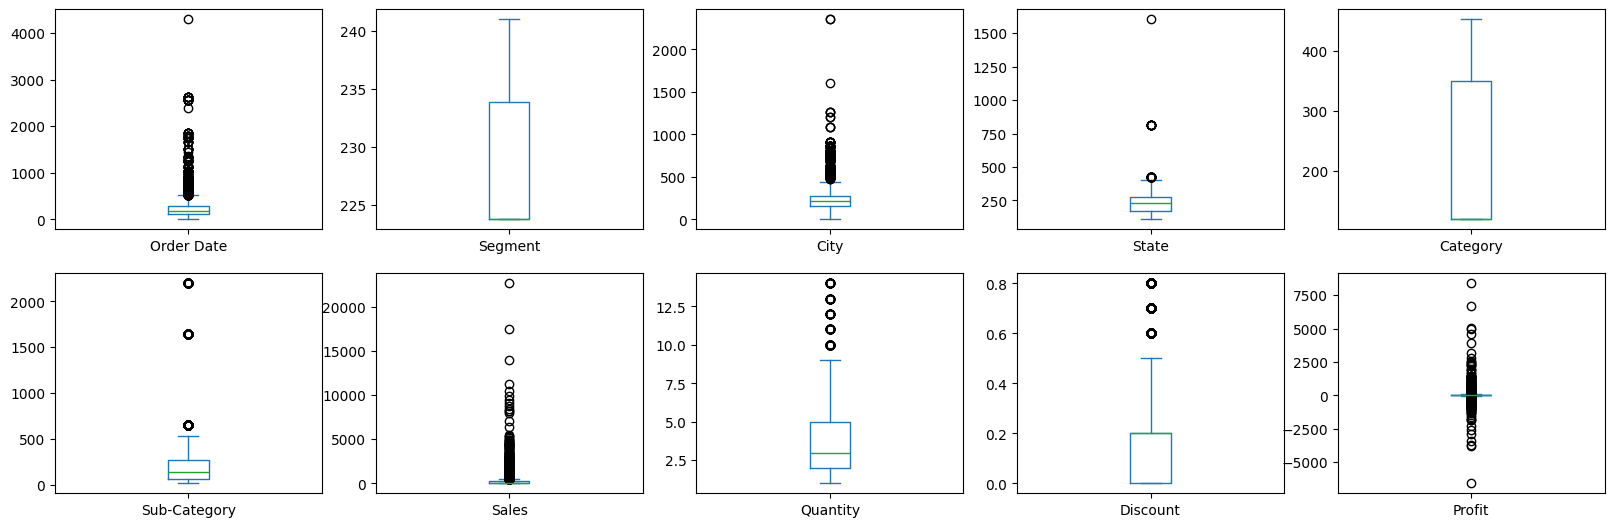

In [ ]:
#representing the outliers
data.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()

In [ ]:
#deleting some of outliers while keeping the consistency of our data
print("Old Shape: ", df.shape[0])
data.drop(index= data[(data['Sales'] > 3000)].index, inplace=True)
data.drop(index= data[(data['Profit'] > 1000) | (data['Profit'] < -500)].index, inplace=True)
data.drop(index= data[(data['Discount'] >= 0.6)].index, inplace=True)
data.drop(index= data[(data['Quantity'] > 11)].index, inplace=True)
print("NEW Shape: ", data.shape[0])

Old Shape:  9994
NEW Shape:  8986


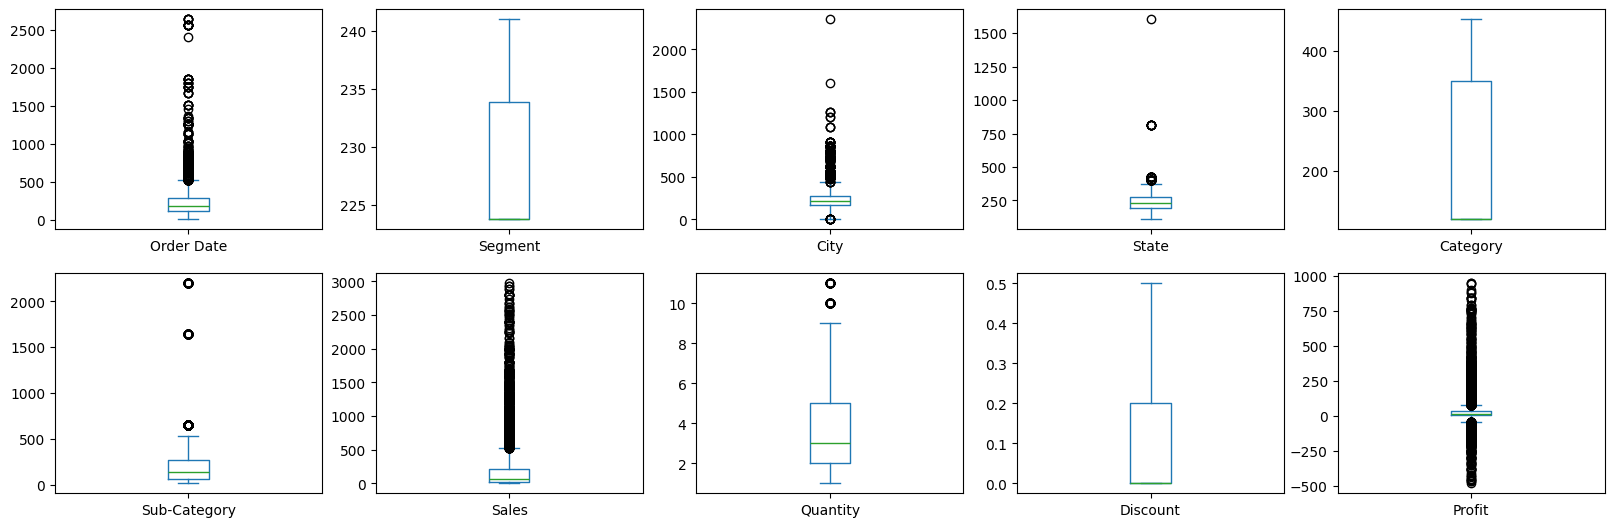

In [ ]:
data.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()

## Regressão Linear

In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6739, 607), (2247, 607), (6739,), (2247,))

In [ ]:
#using standard scaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#using min max scaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print("linear regression")
print("Score (Treinamento): ",lr.score(x_train, y_train))
print("Score (Teste): ", lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('R²:', reg_score )
print('MSE:', mse)
print('MAPE:', mape )
print('MAE:', mae)
print('RMSE:', rmse)

linear regression
Score (Treinamento):  0.6517235277361523
Score (Teste):  0.6053364455324428
R²: 0.6053364455324428
MSE: 49695.52079346077
MAPE: 3.084850847714806
MAE: 126.28820614418997
RMSE: 222.92492187608985


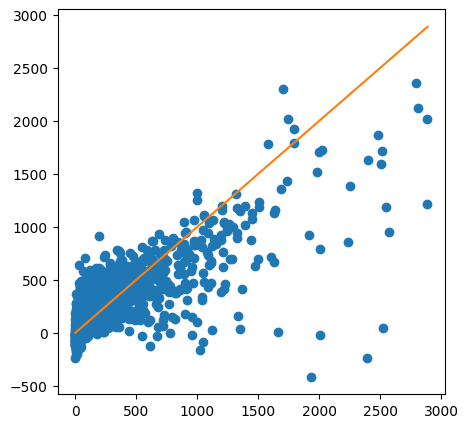

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

## Regressão Polinomial

In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_poly, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6739, 363), (2247, 363), (6739,), (2247,))

In [ ]:
#using standard scaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#using min max scaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print("Polinomial")

print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error

print('R²:', reg_score )
print('MSE:', mse)
print('MAPE:', mape )
print('MAE:', mae)
print('rmse:', rmse)

Polinomial
0.7926277885522267
0.771367374818938
R²: 0.771367374818938
MSE: 28789.12240598843
MAPE: 1.6573993908025686
MAE: 91.11004760039916
rmse: 169.67357603937165


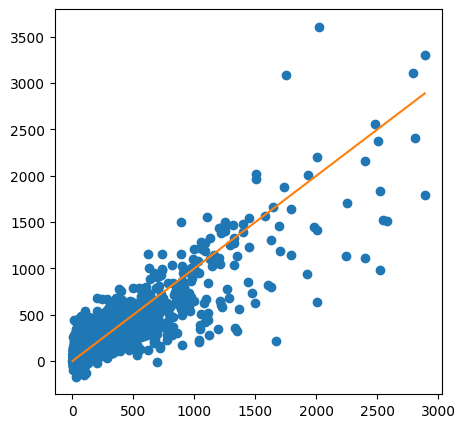

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

## Regressão com Árvore de Decisão


In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

training_accuracy = []
test_accuracy = []

In [ ]:
#using standard scaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#using min max scaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

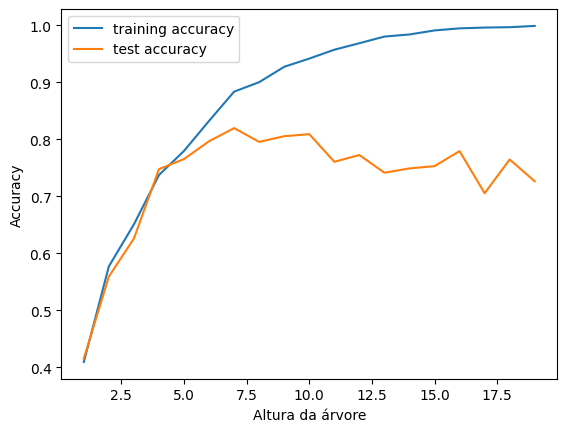

In [ ]:
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    # Construindo o modelo
    classificador = DecisionTreeRegressor(max_depth= k, max_features= 7, random_state= 2)
    # Treinamento do modelo
    classificador.fit(x_train, y_train)
    # Gravando o resultado para os dados de treinamento
    training_accuracy.append(classificador.score(x_train, y_train))
    # Gravando o resultado para os dados de teste (generalização)
    test_accuracy.append(classificador.score(x_test , y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Altura da árvore")
plt.legend()

In [ ]:
dt = DecisionTreeRegressor(max_depth= 7, max_features= 10, random_state= 2)
# param_grid = {"max_depth": [3, None,6,9],
#               "max_features": [5, 7,11, 15],
#               "min_samples_split": [2, 3, 10],
#              "random_state":[2,4,6]}
# grid = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)
# grid_result = grid.fit(x_train, y_train)
dt.fit(x_train,y_train)
print('DT')
print(dt.score(x_train,y_train))
print(dt.score(x_test , y_test))
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('R²:', reg_score )
print('MSE:', mse)
print('MAPE:', mape )
print('MAE:', mae)
print('rmse:', rmse)

DT
0.8849831151848401
0.8263017813189131
R²: 0.8263017813189131
MSE: 21871.853482641844
MAPE: 0.7839146902320289
MAE: 67.28230803160923
rmse: 147.89135702481684


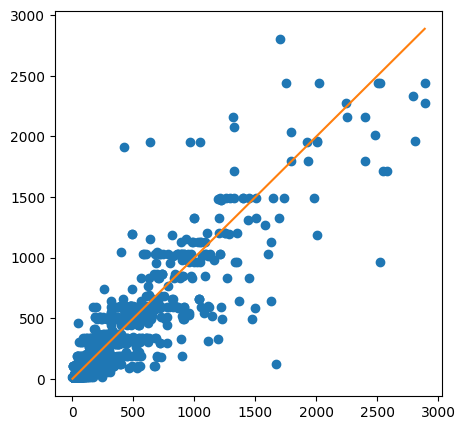

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

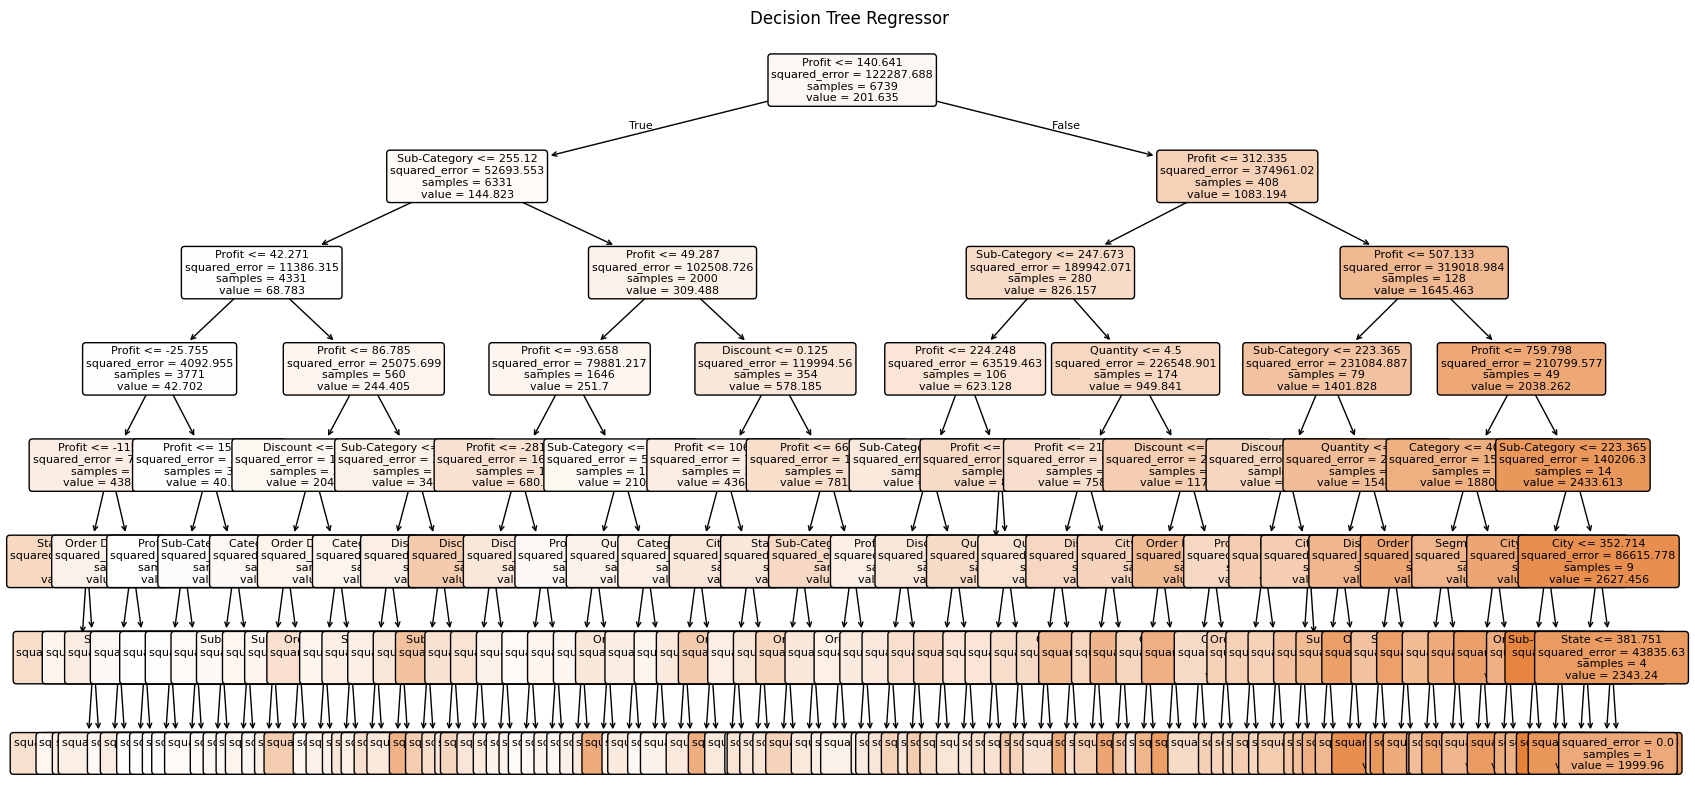

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

feature_names = df_base.drop([target], axis=1).columns.tolist()

# Create the figure
plt.figure(figsize=(20, 10))

# Plot the tree
tree.plot_tree(dt,
               feature_names=feature_names,
               filled=True,
               rounded=True,
               fontsize=8)
plt.title("Decision Tree Regressor")
plt.show()

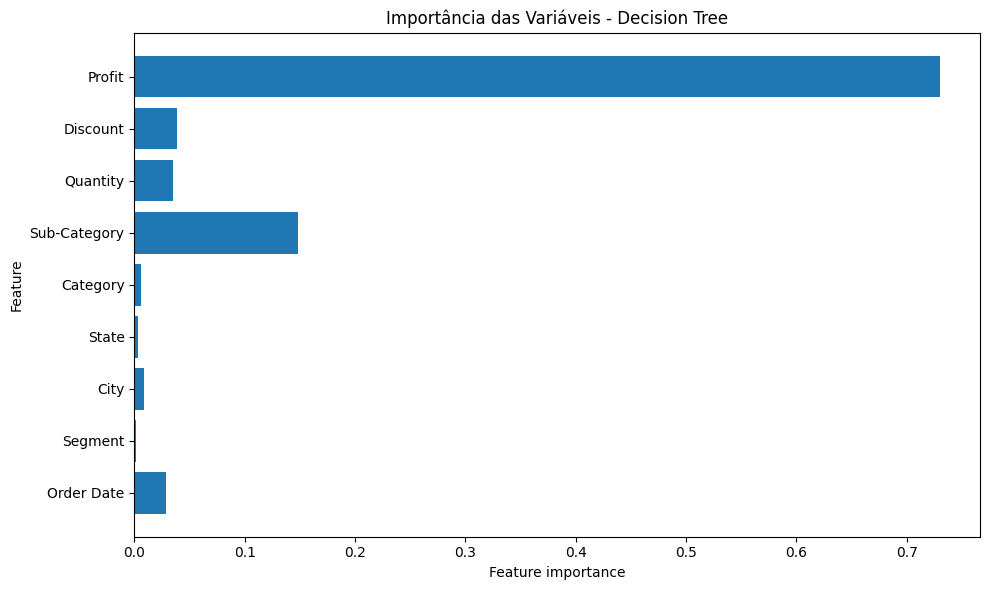

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = data.drop(columns=[target]).columns.tolist()
n_features = x_train.shape[1]

plt.figure(figsize=(10, 6))
plt.barh(range(n_features), dt.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importância das Variáveis - Decision Tree")
plt.tight_layout()
plt.show()

## Regressão com Random Forest

In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

training_accuracy = []
test_accuracy = []

In [ ]:
#using standard scaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#using min max scaler
sc = MinMaxScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

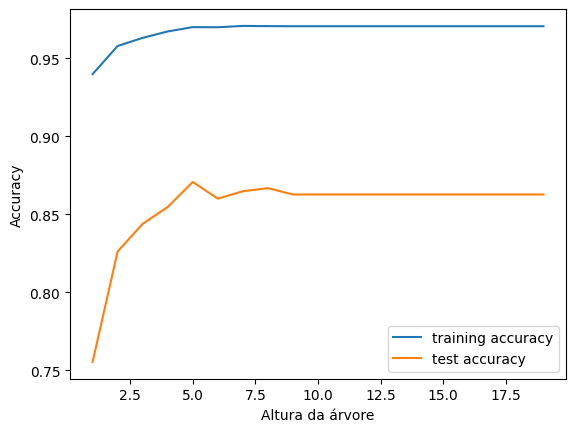

In [ ]:
neighbors_settings = range(1, 20)

for k in neighbors_settings:
    # Construindo o modelo
    classificador = RandomForestRegressor(n_estimators=20, # número de árvores
                          max_features=k, # qtd de caracteristicas
                          max_depth=15,
                          random_state=0)
    # Treinamento do modelo
    classificador.fit(x_train, y_train)
    # Gravando o resultado para os dados de treinamento
    training_accuracy.append(classificador.score(x_train, y_train))
    # Gravando o resultado para os dados de teste (generalização)
    test_accuracy.append(classificador.score(x_test , y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Altura da árvore")
plt.legend()

In [ ]:
rf = RandomForestRegressor(n_estimators=20,
                          max_features=5,
                          max_depth=15,
                          random_state=0)

rf.fit(x_train,y_train)
print('RF')
print(rf.score(x_train,y_train))
print(rf.score(x_test , y_test))
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error

print('R²:', reg_score )
print('MSE:', mse)
print('MAPE:', mape )
print('MAE:', mae)
print('rmse:', rmse)

RF
0.9698706499131026
0.8706513380425547
R²: 0.8706513380425547
MSE: 16287.415058085795
MAPE: 0.39429328335815084
MAE: 54.525060894157136
rmse: 127.62215739473218


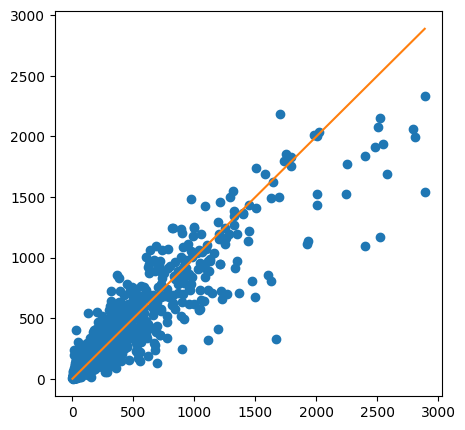

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

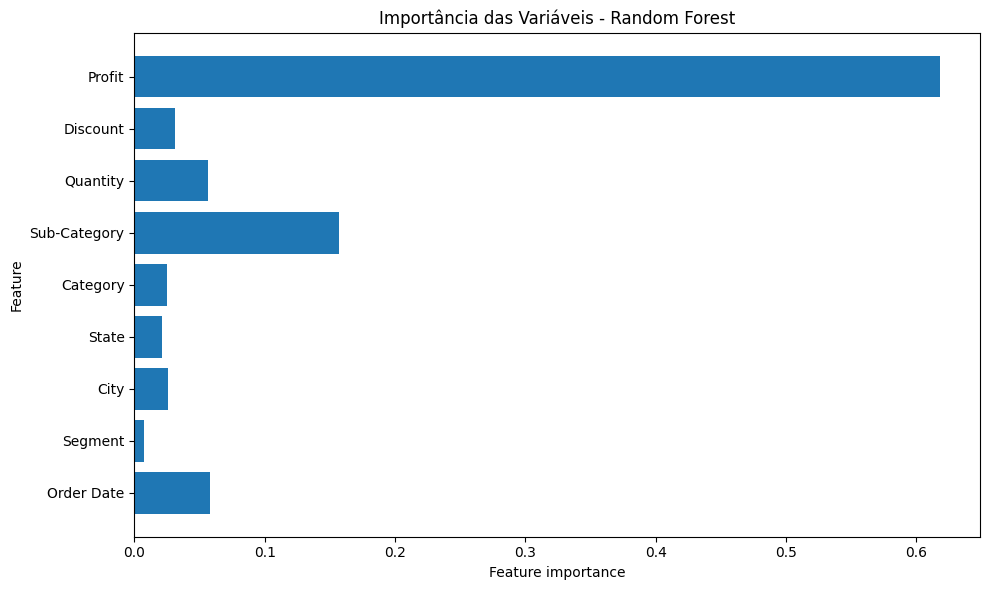

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = data.drop(columns=[target]).columns.tolist()
n_features = x_train.shape[1]

plt.figure(figsize=(10, 6))
plt.barh(range(n_features), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Importância das Variáveis - Random Forest")
plt.tight_layout()
plt.show()

## Regressão com SVM

In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6739, 9), (2247, 9), (6739,), (2247,))

In [ ]:
#using standard scaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_scaled = sc_x.fit_transform(x_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

x_test_scaled = sc_x.transform(x_test)
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

In [ ]:
#using min max scaler
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()

x_train_scaled = sc_x.fit_transform(x_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

x_test_scaled = sc_x.transform(x_test)
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

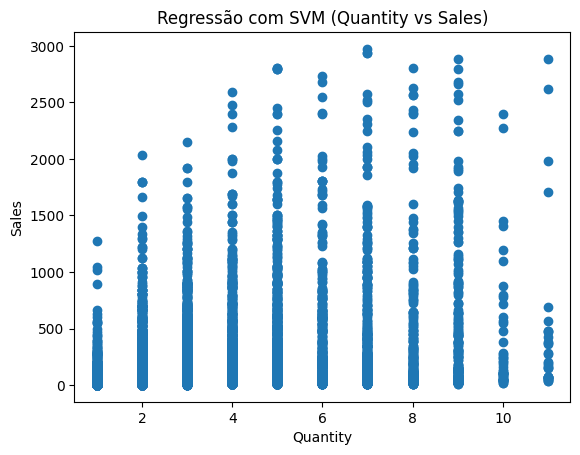

In [ ]:
feature_to_plot = 'Quantity'  # Substitua pelo nome da coluna desejada (Quantity, Discount)
x_plot = data[feature_to_plot].values
y_plot = data[target].values # Assuming 'target' is 'Sales'

plt.scatter(x_plot, y_plot)
plt.title(f'Regressão com SVM ({feature_to_plot} vs {target})')
plt.xlabel(feature_to_plot)
plt.ylabel(target)
plt.show()

In [ ]:
regressor = SVR(kernel = 'rbf', C = 1, gamma = 'scale', epsilon = 0.1) # também pode testar kernel = 'rbf', 'linear' ou 'poly'

regressor.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = regressor.predict(x_test_scaled)

# As previsões (y_pred_scaled) estão na escala escalada.
# Para comparar com os valores reais (y_test) e calcular métricas na escala original,
# precisamos aplicar a transformação inversa nas previsões.

y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

reg_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)

print('SVR Performance (escala original):')
print('R²:', reg_score)
print('MSE:', mse)
print('rmse:', rmse)
print('MAE:', mae)
print('MAPE:', mape )

# O score do regressor na escala escalada (opcional, para ver performance no espaço de treino)
score_scaled = regressor.score(x_test_scaled, y_test_scaled.ravel())
print('Score (escala escalada):', score_scaled)

SVR Performance (escala original):
R²: 0.8074364308143653
MSE: 24247.353849123603
rmse: 155.71561851376245
MAE: 70.72869643638042
MAPE: 1.0765271183049994
Score (escala escalada): 0.8074364308143653


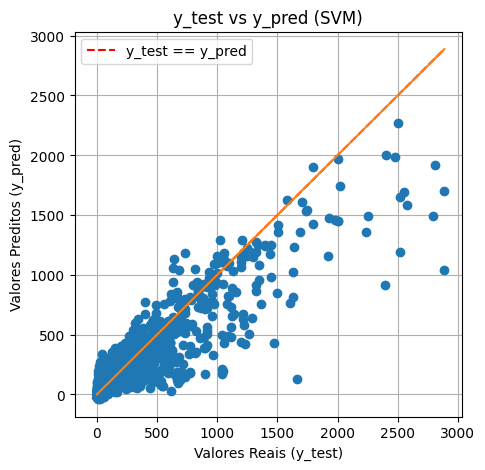

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test.flatten(), y_pred.flatten(), fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y_test == y_pred') # Adiciona a linha de referência

plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Preditos (y_pred)")
plt.title("y_test vs y_pred (SVM)")
plt.legend()
plt.grid(True)
plt.show()
print()

## Regressão com Redes Neurais

In [ ]:
x = data.drop([target] , axis = 1).values
y =data[target].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6739, 9), (2247, 9), (6739,), (2247,))

In [ ]:
#using standard scaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_scaled = sc_x.fit_transform(x_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

x_test_scaled = sc_x.transform(x_test)
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

In [ ]:
#using min max scaler
sc_x = MinMaxScaler()
sc_y = MinMaxScaler()

x_train_scaled = sc_x.fit_transform(x_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1))

x_test_scaled = sc_x.transform(x_test)
y_test_scaled = sc_y.transform(y_test.reshape(-1, 1))

In [ ]:
model = MLPRegressor(activation='logistic',
                     hidden_layer_sizes=(100, 50),
                     max_iter=1000,
                     random_state=42,
                     early_stopping=True)

model.fit(x_train_scaled, y_train_scaled.ravel())

y_pred_scaled = model.predict(x_test_scaled)

y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))


# def mean_absolute_percentage_error_1(y_true, y_pred):
#     return np.mean(np.abs(((y_true - y_pred) / y_true)) * 100)



reg_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test , y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test , y_pred)
mape = mean_absolute_percentage_error(y_test , y_pred)

print('MLPRegressor Performance (escala original):')
print('R²:', reg_score)
print('MSE:', mse)
print('rmse:', rmse)
print('MAE:', mae)
print('MAPE:', mape )

# O score do model na escala escalada (opcional, para ver performance no espaço de treino)
score_scaled = model.score(x_test_scaled, y_test_scaled.ravel())
print('Score (escala escalada):', score_scaled)

MLPRegressor Performance (escala original):
R²: 0.8608577902950288
MSE: 17520.60583595106
rmse: 132.36542537970806
MAE: 65.06661499295218
MAPE: 0.8136725193058326
Score (escala escalada): 0.8608577902950288


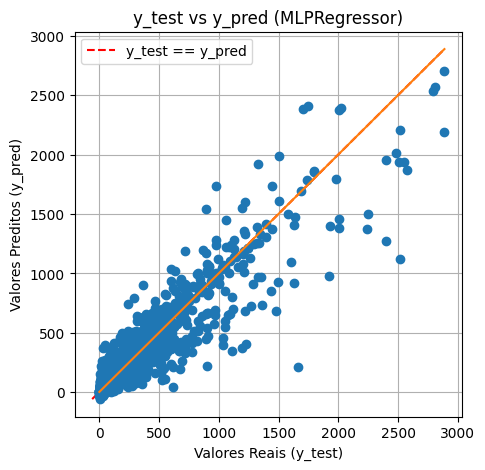

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test.flatten(), y_pred.flatten(), fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y_test == y_pred') # Adiciona a linha de referência

plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Valores Preditos (y_pred)")
plt.title("y_test vs y_pred (MLPRegressor)")
plt.legend()
plt.grid(True)
plt.show()
print()

## Validação Cruzada


### Regressão Linear

In [ ]:
# Dados
x = data.drop([target], axis=1).values
y = data[target].values

# Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x):

    scaler_X = StandardScaler().fit(x[indice_treinamento])
    X_train = scaler_X.transform(x[indice_treinamento])
    X_test = scaler_X.transform(x[indice_teste])

    y_train = y[indice_treinamento]
    y_test = y[indice_teste]

    # Regressão Linear
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predição
    previsoes = regressor.predict(X_test)

    # Métricas
    score = r2_score(y_test, previsoes)
    mae = mean_absolute_error(y_test, previsoes)
    mse = mean_squared_error(y_test, previsoes)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, previsoes)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados finais
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean()} , DESVIO PADRAO: {scores.std()}')
print(f'MAPE médio: {mapes.mean()}, DESVIO PADRAO: {mapes.std()}')
print(f'MAE médio: {maes.mean()}, DESVIO PADRAO: {maes.std()}')
print(f'RMSE médio: {rmses.mean()}, DESVIO PADRAO: {rmses.std()}')
print(f'MSE médio: {mses.mean()}, DESVIO PADRAO: {mses.std()}')

R²  médio: 0.5684886945524414 , DESVIO PADRAO: 0.012227270341089473
MAPE médio: 3.010199894845818, DESVIO PADRAO: 0.09510090052365545
MAE médio: 131.62444843267102, DESVIO PADRAO: 4.579906839299447
RMSE médio: 230.22059998810627, DESVIO PADRAO: 11.311282966736801
MSE médio: 53129.469781237225, DESVIO PADRAO: 5112.813265894196


### Regressão Polinomial

In [ ]:
# Preparação dos dados
x = data.drop([target], axis=1).values
y = data[target].values

# Transformação polinomial
grau = 3
poly = PolynomialFeatures(degree=grau, include_bias=False)
x_poly = poly.fit_transform(x)

# Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x_poly):

    # Separação de treino e teste
    X_train = x_poly[indice_treinamento]
    X_test = x_poly[indice_teste]
    y_train = y[indice_treinamento]
    y_test = y[indice_teste]

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predição
    y_pred = modelo.predict(X_test)

    # Métricas
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean():.4f} , DESVIO PADRAO: {scores.std():.4f}')
print(f'MAPE médio: {mapes.mean():.4f}, DESVIO PADRAO: {mapes.std():.4f}')
print(f'MAE médio: {maes.mean():.2f}, DESVIO PADRAO: {maes.std():.2f}')
print(f'RMSE médio: {rmses.mean():.2f}, DESVIO PADRAO: {rmses.std():.2f}')
print(f'MSE médio: {mses.mean():.2f}, DESVIO PADRAO: {mses.std():.2f}')

### Regressão com Árvore de Decisão

In [ ]:
# Dados
x = data.drop([target], axis=1).values
y = data[target].values

# Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

# Listas para armazenar os resultados
scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x):
    # Separação treino/teste
    X_train = x[indice_treinamento]
    X_test = x[indice_teste]
    y_train = y[indice_treinamento]
    y_test = y[indice_teste]

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Regressor
    dt = DecisionTreeRegressor(max_depth=7, max_features=10, random_state=2)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Métricas
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean():.4f} , DESVIO PADRÃO: {scores.std():.4f}')
print(f'MAPE médio: {mapes.mean():.4f}, DESVIO PADRÃO: {mapes.std():.4f}')
print(f'MAE médio: {maes.mean():.2f}, DESVIO PADRÃO: {maes.std():.2f}')
print(f'RMSE médio: {rmses.mean():.2f}, DESVIO PADRÃO: {rmses.std():.2f}')
print(f'MSE médio: {mses.mean():.2f}, DESVIO PADRÃO: {mses.std():.2f}')


### Regressão com Random Forest

In [ ]:
# Dados
x = data.drop([target], axis=1).values
y = data[target].values

# Configuração do K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

# Listas para armazenar métricas
scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x):
    # Divisão dos dados
    X_train = x[indice_treinamento]
    X_test = x[indice_teste]
    y_train = y[indice_treinamento]
    y_test = y[indice_teste]

    # Escalonamento
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Modelo
    rf = RandomForestRegressor(
        n_estimators=20,
        max_features=5,
        max_depth=15,
        random_state=0
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Métricas
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados finais
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean():.4f} , DESVIO PADRÃO: {scores.std():.4f}')
print(f'MAPE médio: {mapes.mean():.4f}, DESVIO PADRÃO: {mapes.std():.4f}')
print(f'MAE médio: {maes.mean():.2f}, DESVIO PADRÃO: {maes.std():.2f}')
print(f'RMSE médio: {rmses.mean():.2f}, DESVIO PADRÃO: {rmses.std():.2f}')
print(f'MSE médio: {mses.mean():.2f}, DESVIO PADRÃO: {mses.std():.2f}')


R²  médio: 0.8457 , DESVIO PADRÃO: 0.0125
MAPE médio: 0.4591, DESVIO PADRÃO: 0.0223
MAE médio: 59.41, DESVIO PADRÃO: 3.75
RMSE médio: 137.58, DESVIO PADRÃO: 8.83
MSE médio: 19005.09, DESVIO PADRÃO: 2498.00


### Regrassão com SVM

In [ ]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import numpy as np

# Dados
x = data.drop([target], axis=1).values
y = data[target].values

# Validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

# Armazenamento das métricas
scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x):

    scaler_X = StandardScaler().fit(x[indice_treinamento])
    X_train  = scaler_X.transform(x[indice_treinamento])
    X_test   = scaler_X.transform(x[indice_teste])

    scaler_y = StandardScaler().fit(y[indice_treinamento].reshape(-1, 1))
    y_train  = scaler_y.transform(y[indice_treinamento].reshape(-1, 1)).ravel()  # 1-D

    # Treinamento
    svr = SVR(kernel='rbf', C=1, gamma='scale', epsilon=0.1)
    svr.fit(X_train, y_train)

    # Predição e inversão da escala
    y_pred_scaled = svr.predict(X_test)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    y_test_original = y[indice_teste]  # já está na escala original

    # Métricas
    score = r2_score(y_test_original, y_pred)
    mae = mean_absolute_error(y_test_original, y_pred)
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_original, y_pred)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados finais
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean():.4f} , DESVIO PADRÃO: {scores.std():.4f}')
print(f'MAPE médio: {mapes.mean():.4f}, DESVIO PADRÃO: {mapes.std():.4f}')
print(f'MAE médio: {maes.mean():.2f}, DESVIO PADRÃO: {maes.std():.2f}')
print(f'RMSE médio: {rmses.mean():.2f}, DESVIO PADRÃO: {rmses.std():.2f}')
print(f'MSE médio: {mses.mean():.2f}, DESVIO PADRÃO: {mses.std():.2f}')


R²  médio: 0.7866 , DESVIO PADRÃO: 0.0148
MAPE médio: 1.0973, DESVIO PADRÃO: 0.0505
MAE médio: 73.38, DESVIO PADRÃO: 3.87
RMSE médio: 161.75, DESVIO PADRÃO: 8.65
MSE médio: 26238.45, DESVIO PADRÃO: 2840.05


### Regressão com Redes Neurais

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=3)

scores, maes, mses, rmses, mapes = [], [], [], [], []

for indice_treinamento, indice_teste in kfold.split(x):

    # ---------- Padronização DENTRO do fold ----------
    scaler_X = StandardScaler().fit(x[indice_treinamento])
    X_train  = scaler_X.transform(x[indice_treinamento])
    X_test   = scaler_X.transform(x[indice_teste])

    scaler_y = StandardScaler().fit(y[indice_treinamento].reshape(-1, 1))
    y_train  = scaler_y.transform(y[indice_treinamento].reshape(-1, 1)).ravel()  # 1-D

    # ---------- Regressor ----------
    regressor = MLPRegressor(
        activation='logistic',
        max_iter=1000,
        hidden_layer_sizes=(100, 50),
        random_state=42,
early_stopping=True

    )

    # Treinamento e predição
    regressor.fit(X_train, y_train)

    previsoes = regressor.predict(X_test)
    previsoes = scaler_y.inverse_transform(previsoes.reshape(-1, 1))

    y_escala_original = y[indice_teste]  # já na escala original

    # Métricas
    score = r2_score(y_escala_original, previsoes)
    mae   = mean_absolute_error(y_escala_original, previsoes)
    mse   = mean_squared_error(y_escala_original, previsoes)
    rmse  = np.sqrt(mse)
    mape  = mean_absolute_percentage_error(y_escala_original, previsoes)

    scores.append(score)
    maes.append(mae)
    mses.append(mse)
    rmses.append(rmse)
    mapes.append(mape)

# Resultados finais
scores = np.asarray(scores)
maes = np.asarray(maes)
mses = np.asarray(mses)
rmses = np.asarray(rmses)
mapes = np.asarray(mapes)

print(f'R²  médio: {scores.mean():.4f} , DESVIO PADRÃO: {scores.std():.4f}')
print(f'MAPE médio: {mapes.mean():.4f}, DESVIO PADRÃO: {mapes.std():.4f}')
print(f'MAE médio: {maes.mean():.2f}, DESVIO PADRÃO: {maes.std():.2f}')
print(f'RMSE médio: {rmses.mean():.2f}, DESVIO PADRÃO: {rmses.std():.2f}')
print(f'MSE médio: {mses.mean():.2f}, DESVIO PADRÃO: {mses.std():.2f}')

R²  médio: 0.8358 , DESVIO PADRÃO: 0.0179
MAPE médio: 0.8659, DESVIO PADRÃO: 0.0830
MAE médio: 67.79, DESVIO PADRÃO: 6.42
RMSE médio: 141.87, DESVIO PADRÃO: 11.19
MSE médio: 20253.14, DESVIO PADRÃO: 3311.46
